<a href="https://colab.research.google.com/github/thecodeeagle/Vision-based-Defect-Recognition-Using-Fusion-Techniques/blob/main/NEU_Dataset_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing and Dataset Preparation

The dataset had six classes, hence labels are from 0 to 5. Sc, Rs, PS etc were defect folders and Refined_NEU was the main folder

In [ ]:
import os
import numpy as np
directory = 'drive/My Drive/Refined_NEU/Sc/'
count = 0
from PIL import Image
train_images = []
train_labels = []
for filename in os.listdir(directory):
 
    if filename.endswith(".bmp"):
      img = Image.open(directory + filename)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(0)
      count+=1

directory = 'drive/My Drive/Refined_NEU/RS/'

for filename in os.listdir(directory):
  
    if filename.endswith(".bmp"):
      img = Image.open(directory + filename)
       
      
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(1)
      count+=1

directory = 'drive/My Drive/Refined_NEU/PS/'
for filename in os.listdir(directory):
    if filename.endswith(".bmp"):
      img = Image.open(directory + filename)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(2)
      count+=1


directory = 'drive/My Drive/Refined_NEU/Pa/'
for filename in os.listdir(directory):
    if filename.endswith(".bmp"):
      img = Image.open(directory + filename)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(3)
      count+=1
directory = 'drive/My Drive/Refined_NEU/In/'
for filename in os.listdir(directory):
    if filename.endswith(".bmp"):
      img = Image.open(directory+ filename)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(4)
      count+=1
directory = 'drive/My Drive/Refined_NEU/Cr/'
for filename in os.listdir(directory):
    if filename.endswith(".bmp"):
      img = Image.open(directory + filename)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(5)
      count+=1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

In [ ]:
np.savez("drive/My Drive/NEUconverted-", train_images=train_images, test_images = test_images, train_labels = train_labels, test_labels = test_labels)

# Three Model Levels

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import keras
from tensorflow.keras import datasets,models,layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import matplotlib.pyplot as plt

In [ ]:
loaded = np.load("drive/My Drive/NEUconverted-.npz") # dataset was stored as a compressed npz file containing four arrays, images were resized to 224*224
train_images = loaded["train_images"]
train_labels = loaded["train_labels"]
test_images = loaded["test_images"]
test_labels = loaded["test_labels"]

In [ ]:
from imgaug import augmenters as iaa
level1 = iaa.Sequential([
       iaa.GaussianBlur(sigma=(0, 1.0)) # blur images with a sigma of 0 to 3.0
])

level2 = iaa.Sequential([
       iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0; can vary the variance for second level if required
])

In [ ]:
images_aug1 = level1(images=train_images)
images_aug2 = level2(images=images_aug1)

#Base VGG- Model1

In [ ]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
# load model
base_model = VGG16(weights="imagenet", include_top=False, input_tensor=keras.layers.Input(shape=(224, 224, 3)))

In [ ]:
ensemble_model1 = Sequential()
for layer in base_model.layers[:-1]:
    ensemble_model1.add(layer)

In [ ]:
for layer in ensemble_model1.layers:
    layer.trainable = False

In [ ]:
ensemble_model1.add(Flatten())
ensemble_model1.add(Dense(units=128, activation='relu'))
ensemble_model1.add(Dense(units=6, activation='softmax'))

In [ ]:
ensemble_model1.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(0.0001), metrics = ['acc'])

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=6)

In [ ]:
test_images = np.repeat(test_images[..., np.newaxis], 3, -1)
train_images = np.repeat(train_images[..., np.newaxis], 3, -1)

In [ ]:
tf.executing_eagerly()

True

In [ ]:
np.random.seed(0)
history =ensemble_model1.fit(train_images, train_labels, epochs=5, batch_size=8)        

Epoch 1/5
169/169 [==============================] - 5s 28ms/step - loss: 0.7457 - acc: 0.8536
Epoch 2/5
169/169 [==============================] - 5s 27ms/step - loss: 0.0188 - acc: 0.9909
Epoch 3/5
169/169 [==============================] - 5s 27ms/step - loss: 0.0332 - acc: 0.9945
Epoch 4/5
169/169 [==============================] - 5s 27ms/step - loss: 1.2386e-05 - acc: 1.0000
Epoch 5/5
169/169 [==============================] - 5s 27ms/step - loss: 9.0873e-06 - acc: 1.0000


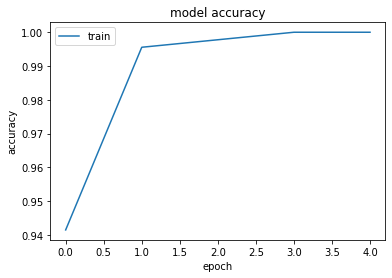

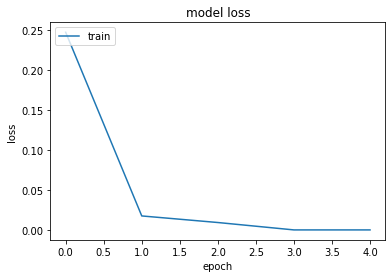

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=6)

In [ ]:
ensemble_model1.evaluate(test_images, test_labels)

15/15 [==============================] - 1s 59ms/step - loss: 0.0426 - acc: 0.9911


[0.042621586471796036, 0.9911110997200012]

In [ ]:
ensemble_model1.save("drive/My Drive/ensemble_model1")

# Model 2

In [ ]:
ensemble_model2 = Sequential()
for layer in base_model.layers[:-1]:
    ensemble_model2.add(layer)

In [ ]:
for layer in ensemble_model2.layers:
    layer.trainable = False

In [ ]:
ensemble_model2.add(Flatten())
ensemble_model2.add(Dense(units=128, activation='relu'))
ensemble_model2.add(Dense(units=6, activation='softmax'))

In [ ]:
ensemble_model2.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(0.0001), metrics = ['acc'])

In [ ]:
tf.executing_eagerly()
np.random.seed(2)

In [ ]:
images_aug1 = np.repeat(images_aug1[..., np.newaxis], 3, -1) 
images_aug2 = np.repeat(images_aug2[..., np.newaxis], 3, -1)

In [ ]:
history = ensemble_model2.fit(images_aug1, train_labels, epochs=5, batch_size=8)          

Epoch 1/5
169/169 [==============================] - 6s 29ms/step - loss: 1.0224 - acc: 0.8389
Epoch 2/5
169/169 [==============================] - 5s 29ms/step - loss: 0.0230 - acc: 0.9928
Epoch 3/5
169/169 [==============================] - 5s 28ms/step - loss: 0.0034 - acc: 0.9997
Epoch 4/5
169/169 [==============================] - 5s 28ms/step - loss: 0.0061 - acc: 0.9996
Epoch 5/5
169/169 [==============================] - 5s 28ms/step - loss: 5.9358e-09 - acc: 1.0000


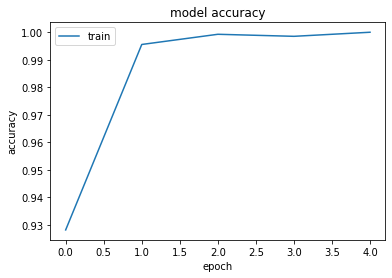

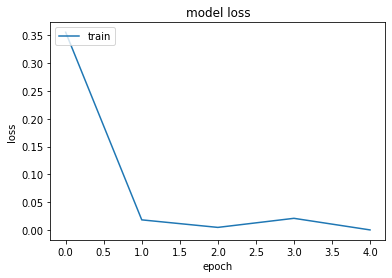

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
ensemble_model2.evaluate(test_images, test_labels)

15/15 [==============================] - 1s 58ms/step - loss: 0.0112 - acc: 0.9978


[0.011237884871661663, 0.9977777600288391]

In [ ]:
ensemble_model2.save("drive/My Drive/ensemble_model2")

INFO:tensorflow:Assets written to: drive/My Drive/ensemble_model2/assets


# Model 3

In [ ]:
ensemble_model3 = Sequential()
for layer in base_model.layers[:-1]:
    ensemble_model3.add(layer)

In [ ]:
for layer in ensemble_model3.layers:
    layer.trainable = False

In [ ]:
ensemble_model3.add(Flatten())
ensemble_model3.add(Dense(units=128, activation='relu'))
ensemble_model3.add(Dense(units=6, activation='softmax'))

In [ ]:
ensemble_model3.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(0.0001), metrics = ['acc'])

In [ ]:
tf.executing_eagerly()
np.random.seed(1)

In [ ]:
history =ensemble_model3.fit(images_aug2, train_labels, epochs=5, batch_size=8)         

Epoch 1/5
169/169 [==============================] - 6s 29ms/step - loss: 1.1109 - acc: 0.8144
Epoch 2/5
169/169 [==============================] - 5s 28ms/step - loss: 0.0250 - acc: 0.9898
Epoch 3/5
169/169 [==============================] - 5s 28ms/step - loss: 0.0225 - acc: 0.9973
Epoch 4/5
169/169 [==============================] - 5s 29ms/step - loss: 1.6471e-05 - acc: 1.0000
Epoch 5/5
169/169 [==============================] - 5s 28ms/step - loss: 8.6098e-05 - acc: 1.0000


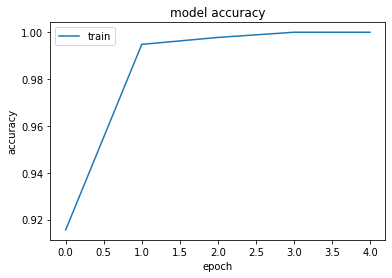

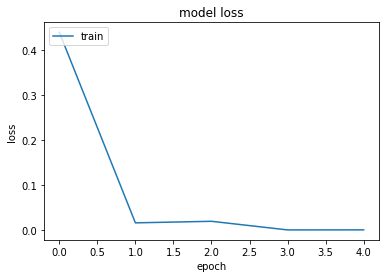

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
ensemble_model3.evaluate(test_images, test_labels)

15/15 [==============================] - 1s 57ms/step - loss: 0.0247 - acc: 0.9956


[0.024745820090174675, 0.995555579662323]

In [ ]:
ensemble_model2.save("drive/My Drive/ensemble_model3")

INFO:tensorflow:Assets written to: drive/My Drive/ensemble_model3/assets


# Fusion Using Majority Voting

In [ ]:
i=0
sum = 0.00
weights = [1,1,1]
while(i<3):
  sum+= (models[i].predict(test_images))* weights[i]
  i+=1

In [ ]:
final = np.argmax(sum/3, axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(final, test_labels)

0.9955555555555555

# Evaluation of Final Results

In [ ]:
final = np.argmax(sum/(np.sum(weights)), axis = 1)

In [ ]:
test_labels = loaded["test_labels"]     #not using one hot encoded ones 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(final, test_labels)

0.9955555555555555

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(40, 40)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.98507463 0.         0.         0.         0.01492537 0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         0.98591549 0.         0.         0.01408451]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


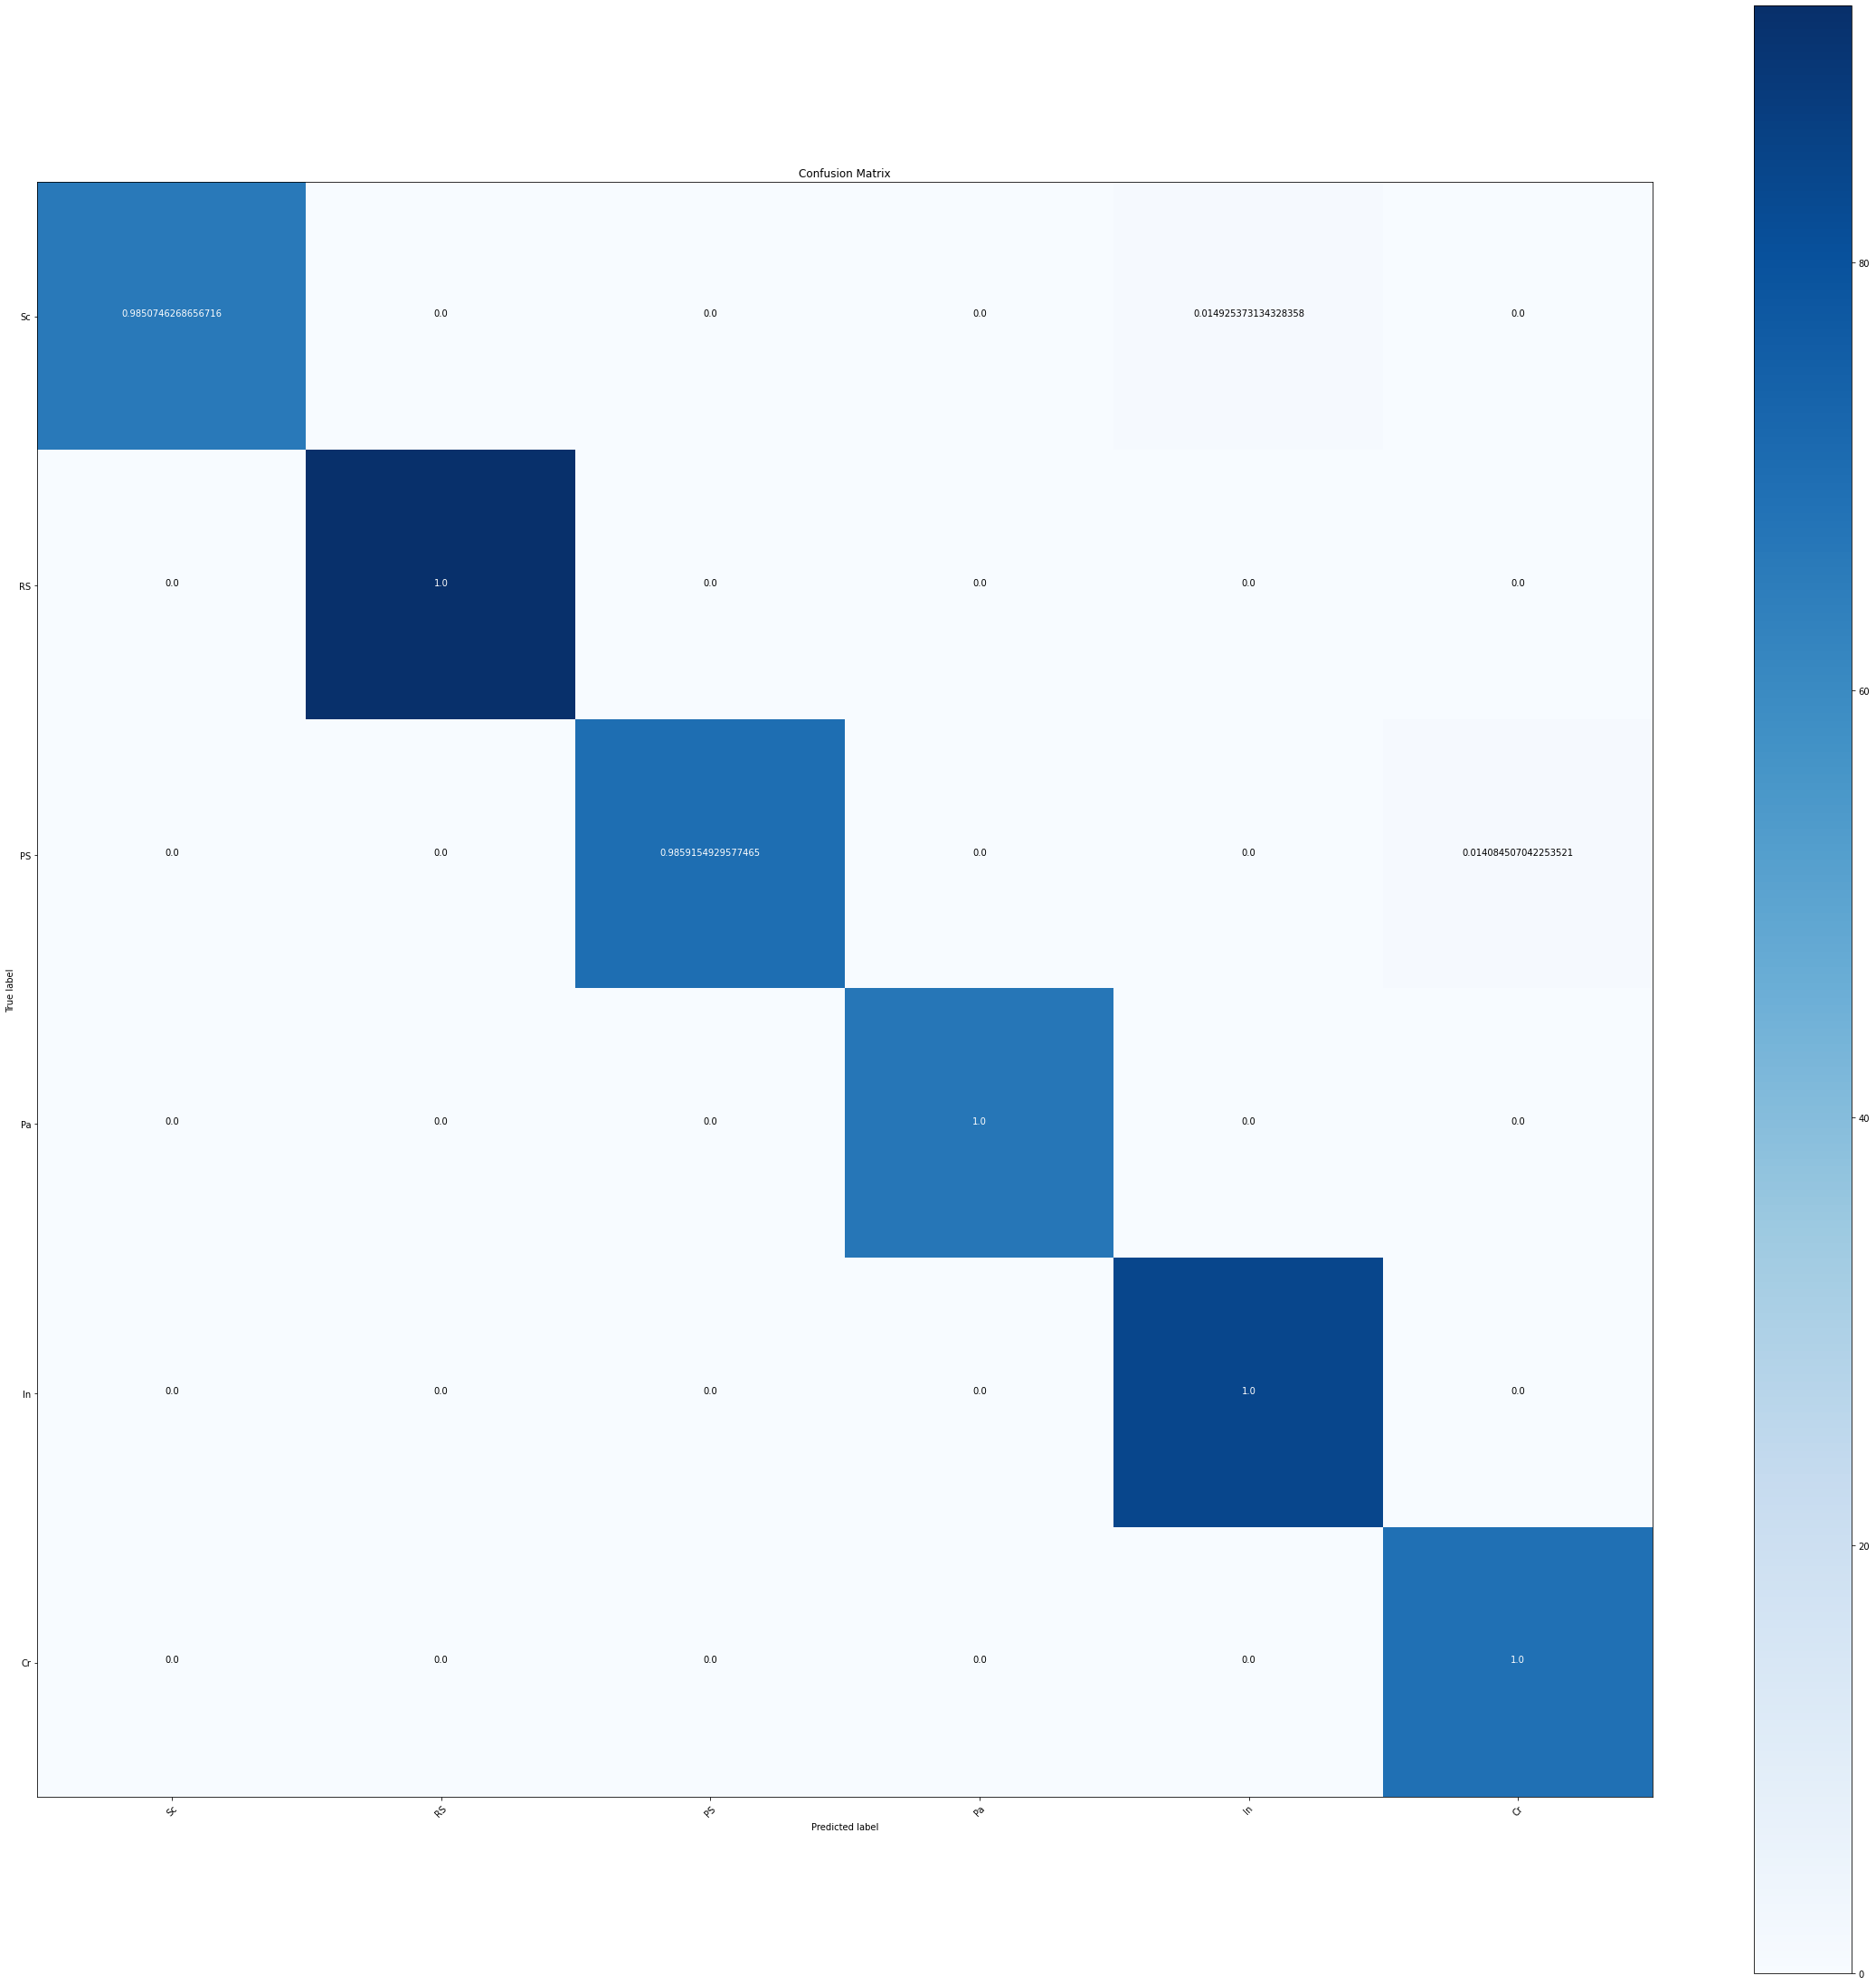

In [ ]:
%matplotlib inline

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_plot_labels = ['Sc', 'RS', 'PS', 'Pa', 'In', 'Cr']
cm= confusion_matrix(y_true = test_labels, y_pred = final)

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix', normalize = True)